PS3: Marks 200. Predicting Shopping Mall Sales. You will have to create model to predict revenue. Identify the model with best params. Target Column - Revenue. Data Link - https://github.com/edyoda/data-science-complete-tutorial/blob/master/Data/Shopping_Revenue.csv


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
#lets load the data!
df = pd.read_csv('mall sales.txt')

In [9]:
df.shape

(137, 43)

Only 137 rows and 43 features! It looks to be a regression problem, but we dont have a lot of training data! We will try to do cross validation to choose the appropriate model!

In [10]:
df.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,7/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,3.0,5,3,4,5,5,4,3,4,5653753
1,1,2/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,6923131
2,2,3/9/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,2055379
3,3,2/2/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,7.5,25,12,10,6,18,12,12,6,2675511
4,4,5/9/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,3.0,5,1,3,2,3,4,3,3,4316715


In [12]:
#lets drop the id column
df.drop('Id', inplace = True, axis = 1)

In [13]:
df.head()

,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,7/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,2.0,...,3.0,5,3,4,5,5,4,3,4,5653753
1,2/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,2.0,...,3.0,0,0,0,0,0,0,0,0,6923131
2,3/9/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,3.0,...,3.0,0,0,0,0,0,0,0,0,2055379
3,2/2/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,4.0,...,7.5,25,12,10,6,18,12,12,6,2675511
4,5/9/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,2.0,...,3.0,5,1,3,2,3,4,3,3,4316715


In [15]:
#Lets see if we have any null values
df.isnull().sum()

#okay so two columns have null values so thats okay!

Open Date     0
City          0
City Group    0
Type          0
P1            0
P2            0
P3            0
P4            0
P5            0
P6            4
P7            4
P8            0
P9            0
P10           0
P11           0
P12           0
P13           0
P14           0
P15           0
P16           0
P17           0
P18           0
P19           0
P20           0
P21           0
P22           0
P23           0
P24           0
P25           0
P26           0
P27           0
P28           0
P29           0
P30           0
P31           0
P32           0
P33           0
P34           0
P35           0
P36           0
P37           0
revenue       0
dtype: int64

In [16]:
df.describe()

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
count,137.000000,137.000000,137.000000,137.000000,137.000000,133.000000,133.000000,137.000000,137.000000,137.000000,...,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,1.370000e+02
mean,4.014599,4.408759,4.317518,4.372263,2.007299,3.323308,5.398496,5.153285,5.445255,5.489051,...,3.135036,2.729927,1.941606,2.525547,1.138686,2.489051,2.029197,2.211679,1.116788,4.453533e+06
std,2.910391,1.514900,1.032337,1.016462,1.209620,2.080024,2.296044,1.858567,1.834793,1.847561,...,1.680887,5.536647,3.512093,5.230117,1.698540,5.165093,3.436272,4.168211,1.790768,2.576072e+06
min,1.000000,1.000000,0.000000,3.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.149870e+06
25%,2.000000,4.000000,4.000000,4.000000,1.000000,2.000000,5.000000,4.000000,4.000000,5.000000,...,2.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.999068e+06
50%,3.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,5.000000,5.000000,5.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.939804e+06
75%,4.000000,5.000000,5.000000,5.000000,2.000000,4.000000,5.000000,5.000000,5.000000,5.000000,...,3.000000,4.000000,3.000000,3.000000,2.000000,3.000000,4.000000,3.000000,2.000000,5.166635e+06
max,12.000000,7.500000,7.500000,7.500000,8.000000,10.000000,10.000000,10.000000,10.000000,10.000000,...,7.500000,25.000000,15.000000,25.000000,6.000000,24.000000,15.000000,20.000000,8.000000,1.969694e+07


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 42 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Open Date   137 non-null    object 
 1   City        137 non-null    object 
 2   City Group  137 non-null    object 
 3   Type        137 non-null    object 
 4   P1          137 non-null    int64  
 5   P2          137 non-null    float64
 6   P3          137 non-null    float64
 7   P4          137 non-null    float64
 8   P5          137 non-null    int64  
 9   P6          133 non-null    float64
 10  P7          133 non-null    float64
 11  P8          137 non-null    int64  
 12  P9          137 non-null    int64  
 13  P10         137 non-null    int64  
 14  P11         137 non-null    int64  
 15  P12         137 non-null    int64  
 16  P13         137 non-null    float64
 17  P14         137 non-null    int64  
 18  P15         137 non-null    int64  
 19  P16         137 non-null    i

# Datatypes

Mostly all the columns are int or float but we have a few object types, let's see what information they store!

In [26]:
df.City.value_counts()

İstanbul          50
Ankara            19
İzmir              9
Bursa              5
Samsun             5
Sakarya            4
Antalya            4
Kayseri            3
Eskişehir          3
Adana              3
Diyarbakır         3
Tekirdağ           3
Muğla              2
Trabzon            2
Aydın              2
Konya              2
Karabük            1
Isparta            1
Bolu               1
Kütahya            1
Amasya             1
Balıkesir          1
Denizli            1
Kocaeli            1
Kırklareli         1
Edirne             1
Uşak               1
Kastamonu          1
Tokat              1
Şanlıurfa          1
Elazığ             1
Gaziantep          1
Afyonkarahisar     1
Osmaniye           1
Name: City, dtype: int64

In [20]:
#Seems like we have the cities of Turkey, and obviously Istanbul and Ankara would have the most malls, this feature could be important
# for us!

In [38]:
#Lets see the average mall sales for the the first 5-10 cities

cities_df = df.groupby(by = 'City').mean().sort_values(by ='revenue', ascending = False)
cities_df.head(20)

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
City,,,,,,,,,,,,,,,,,,,,,
İstanbul,5.360000,5.220000,4.520000,4.640000,1.780000,4.408163,6.040816,5.520000,5.720000,5.680000,...,3.230000,3.760000,2.780000,3.600000,1.380000,3.360000,2.500000,3.100000,1.520000,5.577812e+06
Elazığ,3.000000,4.000000,4.000000,4.000000,2.000000,2.000000,NaN,4.000000,5.000000,5.000000,...,3.000000,5.000000,1.000000,2.000000,2.000000,4.000000,5.000000,5.000000,4.000000,5.525735e+06
Edirne,6.000000,4.500000,6.000000,7.500000,6.000000,4.000000,10.000000,10.000000,10.000000,10.000000,...,2.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.444227e+06
İzmir,3.222222,4.666667,4.333333,3.444444,1.444444,2.333333,5.000000,4.444444,4.666667,4.888889,...,2.777778,2.222222,1.888889,1.888889,1.333333,1.777778,2.333333,1.888889,0.888889,5.287571e+06
Trabzon,5.500000,4.500000,4.500000,5.500000,4.000000,4.000000,7.000000,5.000000,6.000000,7.000000,...,5.250000,10.000000,4.500000,7.500000,2.000000,12.000000,6.000000,8.000000,1.000000,5.284100e+06
Afyonkarahisar,1.000000,1.000000,4.000000,4.000000,1.000000,2.000000,1.000000,5.000000,5.000000,5.000000,...,3.000000,4.000000,5.000000,5.000000,3.000000,4.000000,5.000000,4.000000,5.000000,4.952497e+06
Adana,4.000000,5.000000,4.000000,3.000000,1.000000,2.666667,5.000000,4.666667,4.666667,5.000000,...,2.666667,4.333333,3.666667,3.666667,3.000000,3.666667,4.000000,3.333333,2.666667,4.894944e+06
Balıkesir,3.000000,4.000000,5.000000,4.000000,2.000000,2.000000,5.000000,4.000000,5.000000,5.000000,...,3.000000,5.000000,5.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,4.758476e+06
Kayseri,5.333333,5.000000,4.666667,4.666667,2.666667,3.666667,6.666667,6.333333,6.333333,6.666667,...,4.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.567576e+06


In [36]:
#So istanbul does have the most mean sales, but ankara is far behind(not in the top 20)

In [41]:
#lets see what the other object data types tell us
df['City Group'].value_counts()

Big Cities    78
Other         59
Name: City Group, dtype: int64

In [42]:
# lets see if theres a difference in mean mall sales for these two groups, we can anyways just convert this to a binary feature
df.groupby(by = 'City Group').mean().sort_values(by ='revenue', ascending = False)

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
City Group,,,,,,,,,,,,,,,,,,,,,
Big Cities,4.666667,4.961538,4.391026,4.525641,1.987179,4.051948,5.753247,5.269231,5.474359,5.487179,...,3.083333,3.320513,2.564103,3.294872,1.294872,3.012821,2.410256,2.705128,1.256410,4.983480e+06
Other,3.152542,3.677966,4.220339,4.169492,2.033898,2.321429,4.910714,5.000000,5.406780,5.491525,...,3.203390,1.949153,1.118644,1.508475,0.932203,1.796610,1.525424,1.559322,0.932203,3.752924e+06


In [43]:
# There is definitely a difference in average revenue, but that could be due to istanbuls dominance, lets check for 
#median revenues as well
df.groupby(by = 'City Group').median().sort_values(by ='revenue', ascending = False)

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
City Group,,,,,,,,,,,,,,,,,,,,,
Big Cities,4.0,5.0,4.0,4.0,2.0,3.0,5.0,5.0,5.0,5.0,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4234908.0
Other,3.0,4.0,4.0,4.0,2.0,2.0,5.0,5.0,5.0,5.0,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3745135.0


In [44]:
df.Type.value_counts()

FC    76
IL    60
DT     1
Name: Type, dtype: int64

In [45]:
#Lets do the same for the type variable
df.groupby(by = 'Type').mean().sort_values(by ='revenue', ascending = False)

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
Type,,,,,,,,,,,,,,,,,,,,,
FC,3.565789,4.236842,4.197368,4.302632,1.921053,3.082192,5.094595,4.947368,5.184211,5.223684,...,2.993421,0.065789,0.065789,0.078947,0.078947,0.092105,0.065789,0.078947,0.105263,4.683963e+06
IL,4.633333,4.650000,4.541667,4.450000,2.066667,3.593220,5.862069,5.416667,5.783333,5.833333,...,3.316667,6.150000,4.350000,5.666667,2.500000,5.566667,4.550000,4.950000,2.416667,4.172379e+06
DT,1.000000,3.000000,0.000000,5.000000,5.000000,5.000000,1.000000,5.000000,5.000000,5.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.810007e+06


In [46]:
# a little bit of difference but we can change it up too!

## Numerical Datatypes
Lets see if the features are normally distributed and if they are correlated with the target variable

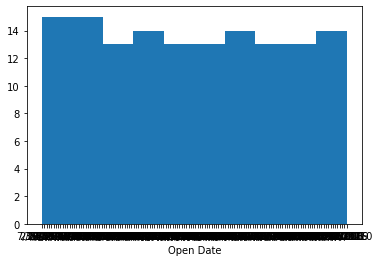

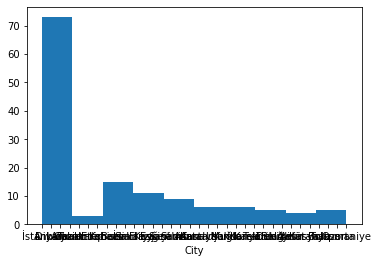

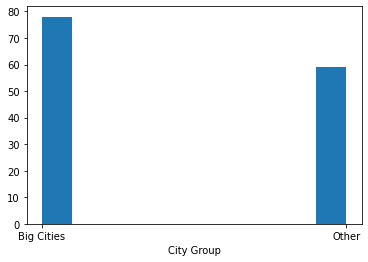

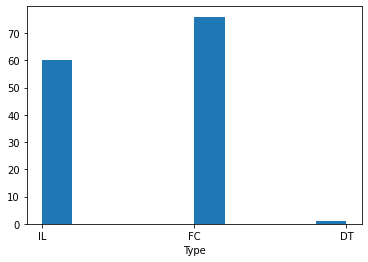

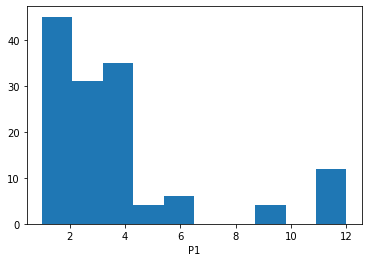

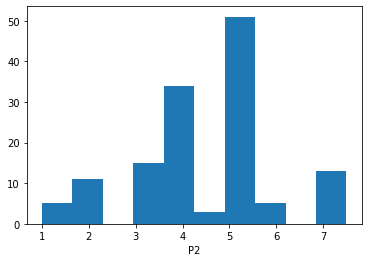

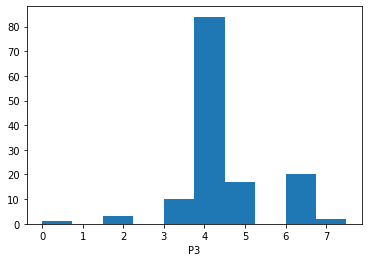

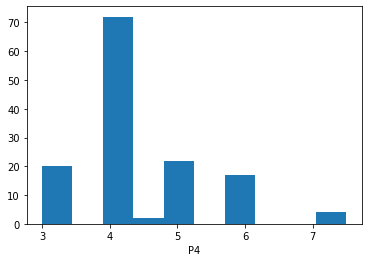

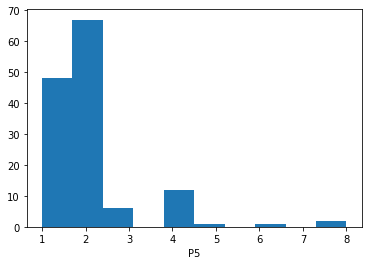

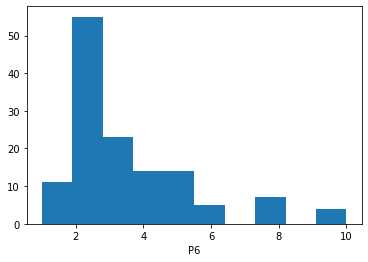

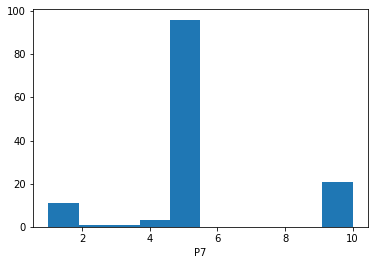

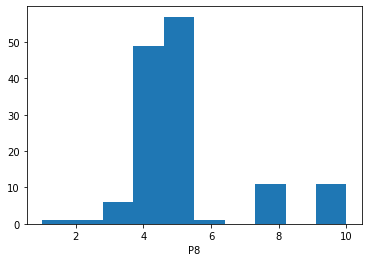

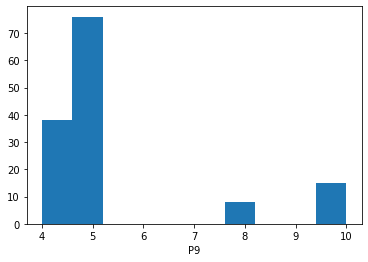

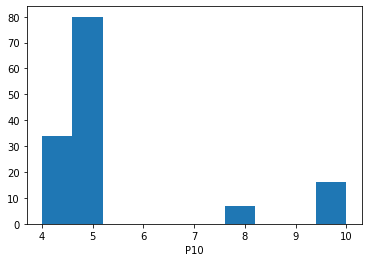

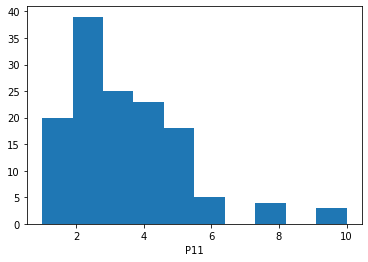

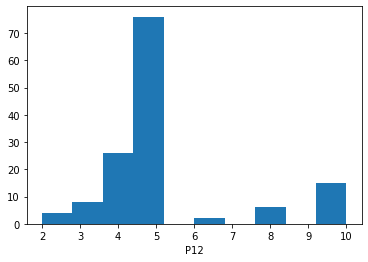

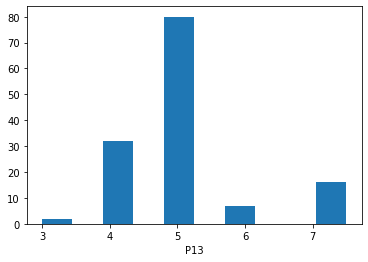

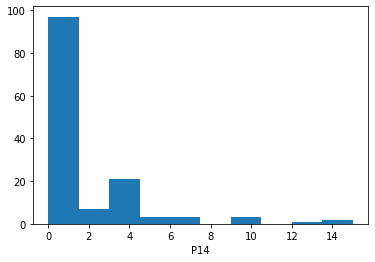

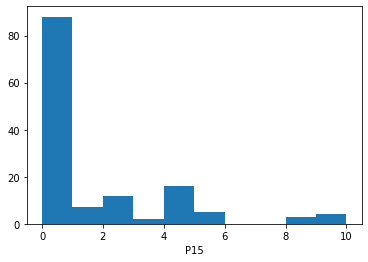

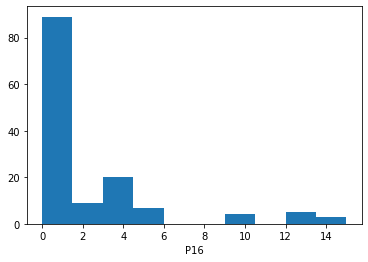

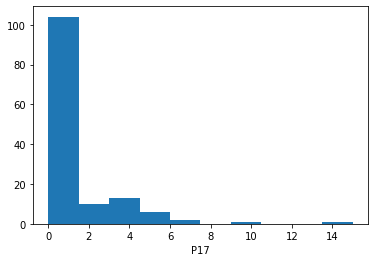

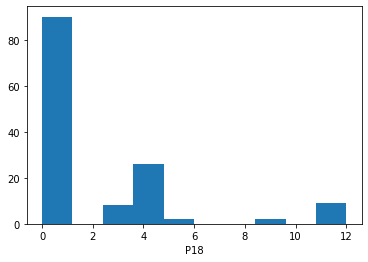

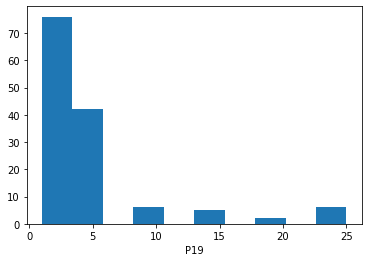

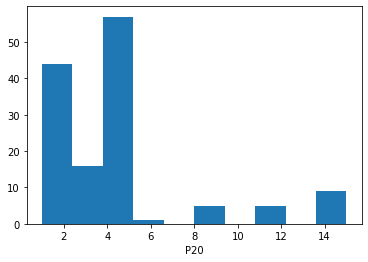

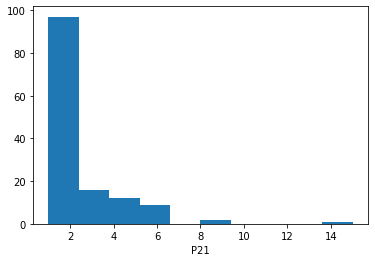

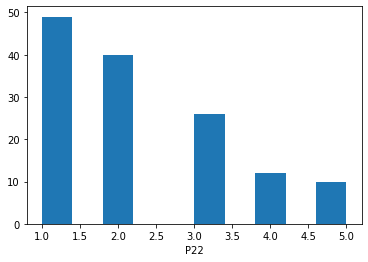

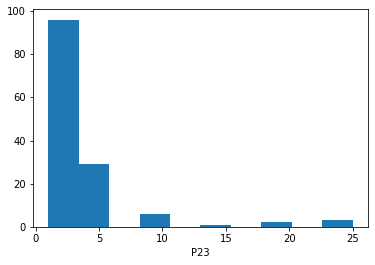

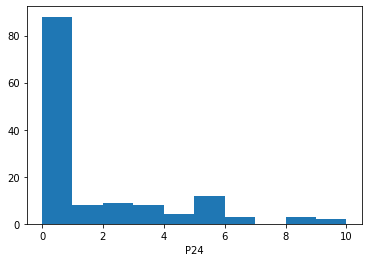

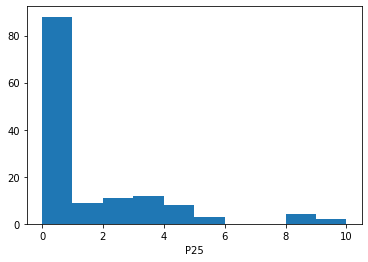

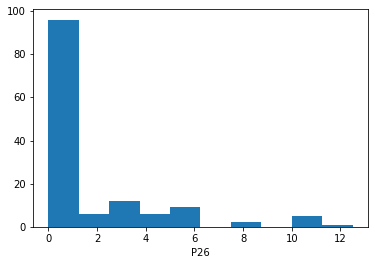

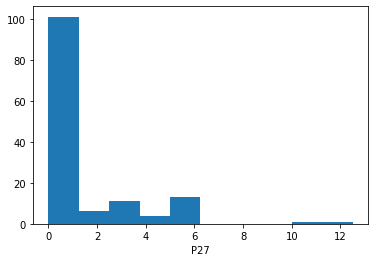

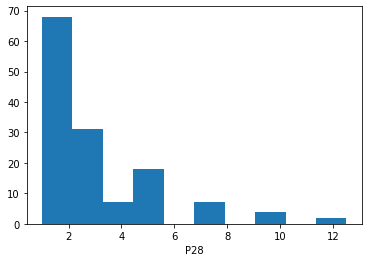

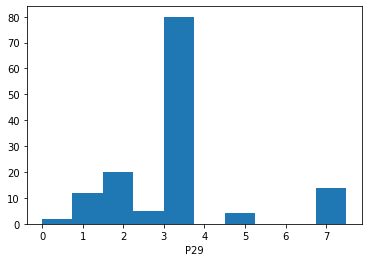

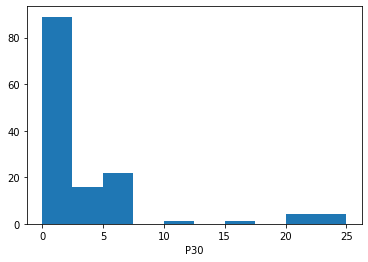

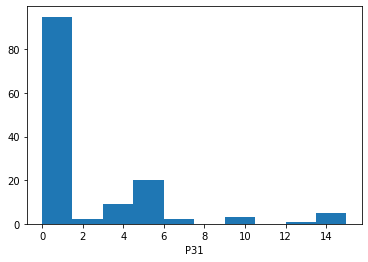

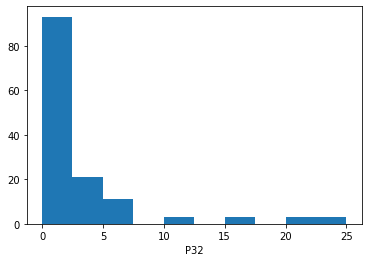

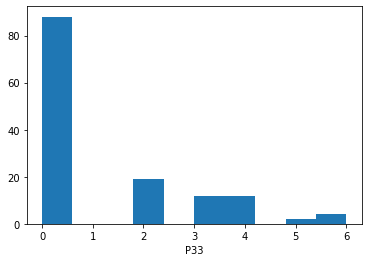

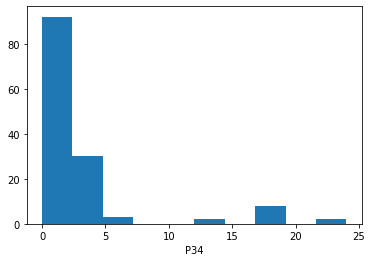

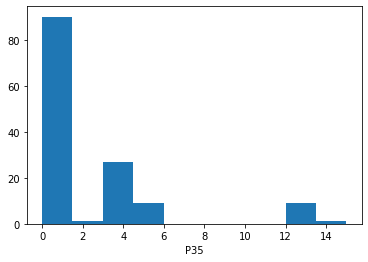

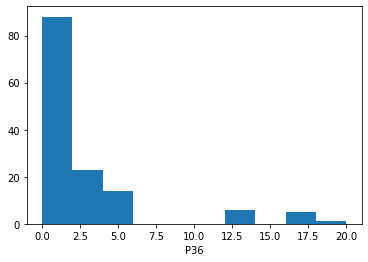

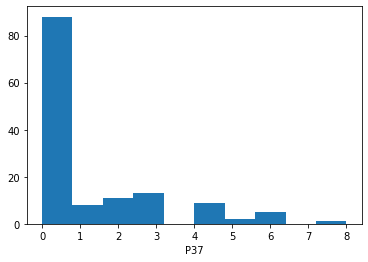

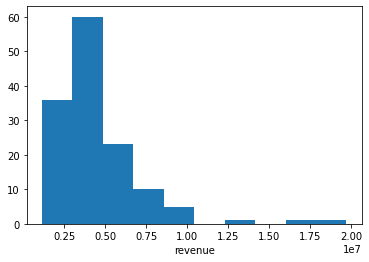

In [52]:
for i in list(df):
    plt.hist(df[i], bins = 10)
    plt.xlabel(i)
    plt.show()

In [53]:
#Opening Date seems to be evenly distributed, what we could do, is create a feature which would be the malls age today
# so we could simply subtract the date from todays date and we would have the malls age, which would be numerical too

#most of the variables dont look to be normally distributed so we can go ahead with Standard Scaling!
# Now let's check out the correlation of these features

In [54]:
corr = df.corr()

In [449]:
corr['revenue'].sort_values(ascending = False)
#okay so no feature is especially highly correlated with the target

revenue    1.000000
age        0.326140
P2         0.191518
P28        0.155534
P6         0.153737
P21        0.097411
P11        0.084247
P22        0.083562
P17        0.067137
P23        0.045507
P4         0.035685
P19        0.027984
P20        0.014147
P27       -0.013680
P3        -0.024613
P5        -0.028191
P29       -0.114846
Name: revenue, dtype: float64

In [454]:
df_mod = df[:]

In [455]:
#columns we shall drop due to multicollinearity(P1,P7,P10,p8,p9,p12,p13,p14,p15,p16,p18,p24,p25,p26,p30,p31,p32,p33,p34,p35,p36,p37)
df_mod.drop(['P1','P7','P10','P8',"P9",'P12','P13','P15','P14','P16','P18','P24','P25','P26','P30','P31','P32','P33','P34','P35','P36','P37','P19','P20','P23','P28'], axis = 1, inplace = True)

c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [457]:
corr = df_mod.corr()
corr[(corr > 0.5) | (corr < -0.5)]

,P2,P3,P4,P5,P6,P11,P17,P21,P22,P27,P29,revenue
P2,1.000000,NaN,0.540322,NaN,0.663426,NaN,NaN,0.522294,NaN,NaN,NaN,NaN
P3,NaN,1.000000,NaN,NaN,0.557588,NaN,NaN,0.559543,NaN,NaN,0.571525,NaN
P4,0.540322,NaN,1.000000,0.715406,0.592105,0.585285,NaN,0.545285,NaN,NaN,NaN,NaN
P5,NaN,NaN,0.715406,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
P6,0.663426,0.557588,0.592105,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.540019,NaN
P11,NaN,NaN,0.585285,NaN,NaN,1.000000,NaN,0.692302,NaN,NaN,NaN,NaN
P17,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,0.600446,NaN,NaN
P21,0.522294,0.559543,0.545285,NaN,NaN,0.692302,NaN,1.000000,NaN,NaN,NaN,NaN
P22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
P27,NaN,NaN,NaN,NaN,NaN,NaN,0.600446,NaN,NaN,1.000000,NaN,NaN


In [458]:
#We could do some hyper parameter tuning later!

In [459]:
#First lets create the age of mall feature

In [460]:
from datetime import datetime, date

In [461]:
df_mod['Open Date'] = pd.to_datetime(df['Open Date'])

<ipython-input-461-23a411078629>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mod['Open Date'] = pd.to_datetime(df['Open Date'])


In [462]:
df_mod['age'] = df_mod['Open Date'].apply(lambda x: datetime.today().year - x.year)

<ipython-input-462-32290651dfc9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mod['age'] = df_mod['Open Date'].apply(lambda x: datetime.today().year - x.year)


In [463]:
#Okay now we can split our dataset to test and train!!

In [464]:
from sklearn.model_selection import train_test_split

In [465]:
y = df_mod.revenue
X = df_mod.drop(['revenue','Open Date','City'], axis = 1)

In [466]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 0)

In [467]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [468]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [469]:
list(X_train)

['City Group',
 'Type',
 'P2',
 'P3',
 'P4',
 'P5',
 'P6',
 'P11',
 'P17',
 'P21',
 'P22',
 'P27',
 'P29',
 'age']

In [470]:
X_nums = ['P2',
 'P3',
 'P4',
 'P5',
 'P6',
 'P11',
 'P17',
 'P21',
 'P22',
 'P27',
 'P29',
 'age']

In [471]:
X_cats = ['City Group',
 'Type']

In [472]:
from sklearn.feature_selection import SelectKBest

In [473]:
num_pipeline = Pipeline([('imputer', SimpleImputer(strategy = 'median')),
                         ('scaler', StandardScaler())])
cat_pipeline = Pipeline([('encoder', OneHotEncoder(drop = 'first'))])

In [474]:
full_pipeline = ColumnTransformer([('num', num_pipeline, X_nums),
                                  ('cat', cat_pipeline, X_cats)])

In [475]:
X_train_prepared = full_pipeline.fit_transform(X_train,y_train)

In [476]:
from sklearn.metrics import mean_squared_error

In [477]:
from sklearn.linear_model import LinearRegression

In [478]:
lir = LinearRegression()
lir.fit(X_train_prepared, y_train)

LinearRegression()

In [479]:
print(lir.score(X_train_prepared, y_train))
lir_preds = lir.predict(X_train_prepared)

0.24649289948614372


In [480]:
mse_lir = mean_squared_error(y_train, lir_preds)
rmse_lir = np.sqrt(mse_lir)

In [481]:
rmse_lir

2037233.0846403008

In [482]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()
rf_model.fit(X_train_prepared, y_train)
rf_model.score(X_train_prepared,y_train)

0.8309157561939262

In [483]:
rf_preds = rf_model.predict(X_train_prepared)
mse_rf = mean_squared_error(y_train, rf_preds)
rmse_rf = np.sqrt(mse_rf)

In [484]:
rmse_rf

965047.3348763587

In [485]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

In [486]:
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train_prepared, y_train)
dt_model.score(X_train_prepared,y_train)

1.0

In [487]:
dt_preds = dt_model.predict(X_train_prepared)
mse_dt = mean_squared_error(y_train, dt_preds)
rmse_dt = np.sqrt(mse_dt)

In [488]:
rmse_dt

0.0

In [489]:
knn_model = KNeighborsRegressor()
knn_model.fit(X_train_prepared, y_train)
print(knn_model.score(X_train_prepared,y_train))

knn_preds = knn_model.predict(X_train_prepared)
mse_knn = mean_squared_error(y_train, knn_preds)
rmse_knn = np.sqrt(mse_knn)
print(rmse_knn)

0.25684973770421504
2023183.9153169827


In [490]:
#Okay so far, we have got decision tree model score of 1
#Random Forest score of 86% and rmse of 832909
#Lir score is 60%

In [491]:
#Lets try ridge and lasso regression too as they will neutralise the features

In [492]:
from sklearn.linear_model import Lasso

In [493]:
las_model = Lasso(alpha = 2, normalize = True)
las_model.fit(X_train_prepared, y_train)
las_model.score(X_train_prepared, y_train)

0.24649287956821797

In [494]:
#Now lets try grid search and fine tune the model!
from sklearn.model_selection import GridSearchCV

In [495]:
param_grid = [{'n_estimators':[80,100,130],'max_features':[10,20,15]}]

In [496]:
grid_search = GridSearchCV(rf_model, param_grid, cv = 5, scoring = 'neg_mean_squared_error', return_train_score = True)

In [497]:
grid_search.fit(X_train_prepared, y_train)

c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  Fil

c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  Fil

c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [-6.74960963e+12 -6.59468973e+12 -6.68587228e+12             nan
             nan             nan -7.23549368e+12 -6.89245999e+12
 -7.21061284e+12]
  warnings.warn(
c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the train scores are non-finite: [-8.50768984e+11 -8.38655374e+11 -8.75035742e+11             nan
             nan             nan -9.12827686e+11 -9.46576727e+11
 -8.76497132e+11]
  warnings.warn(


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [10, 20, 15],
                          'n_estimators': [80, 100, 130]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [498]:
grid_search.best_params_

{'max_features': 10, 'n_estimators': 100}

In [499]:
rmse = np.sqrt(-grid_search.best_score_)
print(rmse)

2568012.7984903795


In [500]:
final_model = grid_search.best_estimator_

In [501]:
X_test_prepared = full_pipeline.transform(X_test)

In [502]:
final_model.score(X_test_prepared,y_test)

0.14004371779292002

In [503]:
final_model.score(X_train_prepared,y_train)

0.8382157736182425

In [447]:
#Clearly the model is overfitting on the training data! 